In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [13]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

<Axes: >

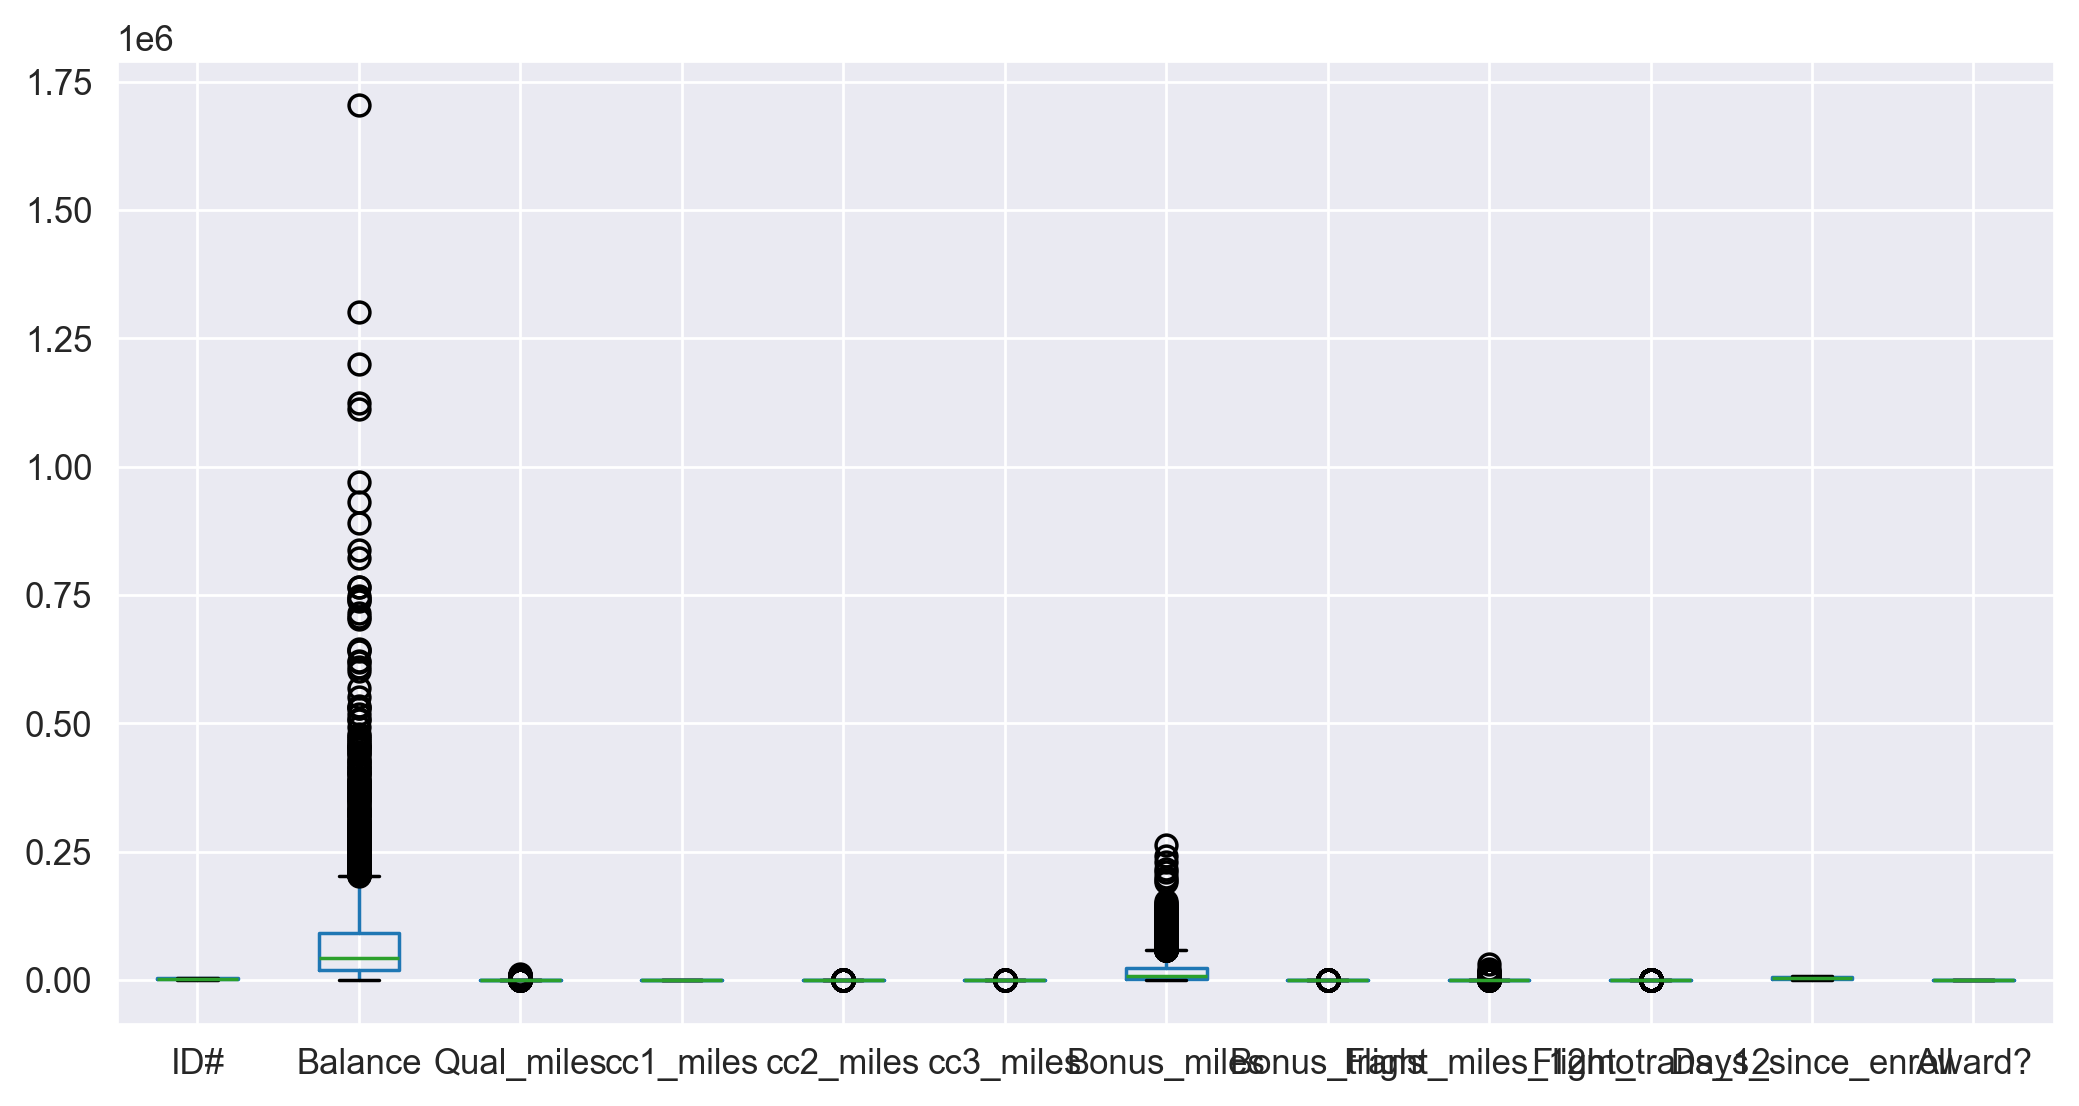

In [14]:
df.boxplot()

In [15]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [35]:
def replace_outliers_with_iqr_capping(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with capped values
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

# Replace outliers in column 'B' using capping method with IQR and a threshold of 1.5



In [ ]:
df = replace_outliers_with_iqr_capping(df, 'Balance', threshold=1.5)


In [38]:
df = replace_outliers_with_iqr_capping(df, 'Qual_miles', threshold=1.5)

In [39]:
df = replace_outliers_with_iqr_capping(df, 'cc2_miles', threshold=1.5)


In [40]:
df = replace_outliers_with_iqr_capping(df, 'cc3_miles', threshold=1.5)


In [41]:
df = replace_outliers_with_iqr_capping(df, 'Bonus_miles', threshold=1.5)


In [43]:
df = replace_outliers_with_iqr_capping(df, 'Bonus_trans', threshold=1.5)


In [44]:
df = replace_outliers_with_iqr_capping(df, 'Flight_miles_12mo', threshold=1.5)


In [45]:
df = replace_outliers_with_iqr_capping(df, 'Flight_trans_12', threshold=1.5)


<Axes: >

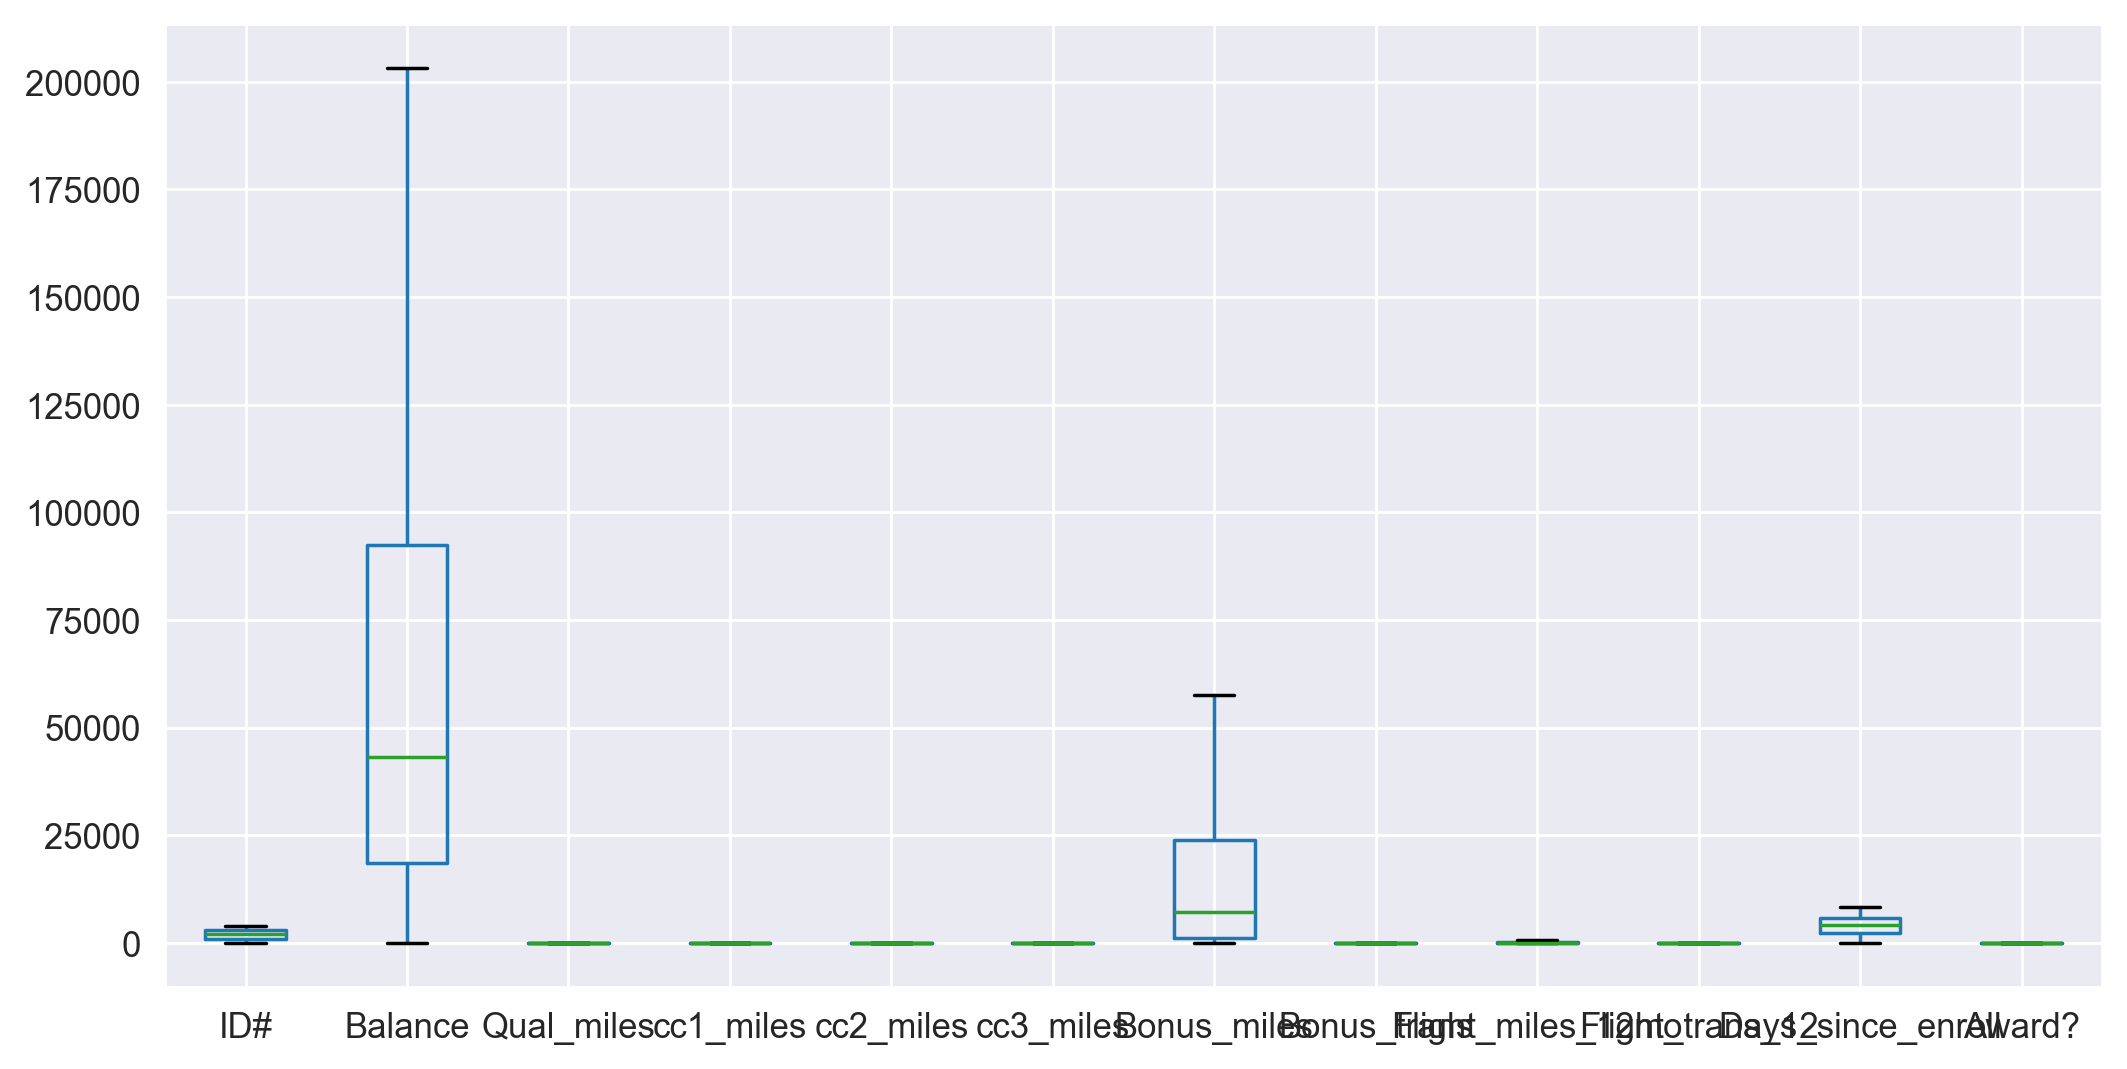

In [46]:
df.boxplot()

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [49]:
from sklearn.cluster import KMeans

In [50]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([3, 3, 3, ..., 0, 7, 5])

In [51]:
km.cluster_centers_

array([[ 0.40914711, -0.44906819,  0.        , -0.16689969,  0.        ,
         0.        , -0.23109428, -0.08768466, -0.48095896, -0.47637569,
        -0.40204621,  1.30391816],
       [-0.9093824 ,  0.60630668,  0.        , -0.55870266,  0.        ,
         0.        , -0.32983583,  0.11392879,  1.68811098,  1.69009753,
         0.90338741,  0.65075079],
       [-0.43902161,  1.11212226,  0.        ,  1.50170585,  0.        ,
         0.        ,  1.72623086,  1.60568378,  1.71052257,  1.65053146,
         0.44797301,  0.94891745],
       [-0.83980486, -0.38836435,  0.        , -0.65513447,  0.        ,
         0.        , -0.66701804, -0.61223562, -0.53803426, -0.54140739,
         0.8184065 , -0.55115224],
       [-0.26671771,  0.86481394,  0.        ,  1.04258262,  0.        ,
         0.        ,  0.81252771,  0.59188439, -0.45806787, -0.47028656,
         0.25990897, -0.74997993],
       [ 1.01867007, -0.58019919,  0.        , -0.63007072,  0.        ,
         0.        , -

In [52]:
km.inertia_

12803.055445144264

In [53]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

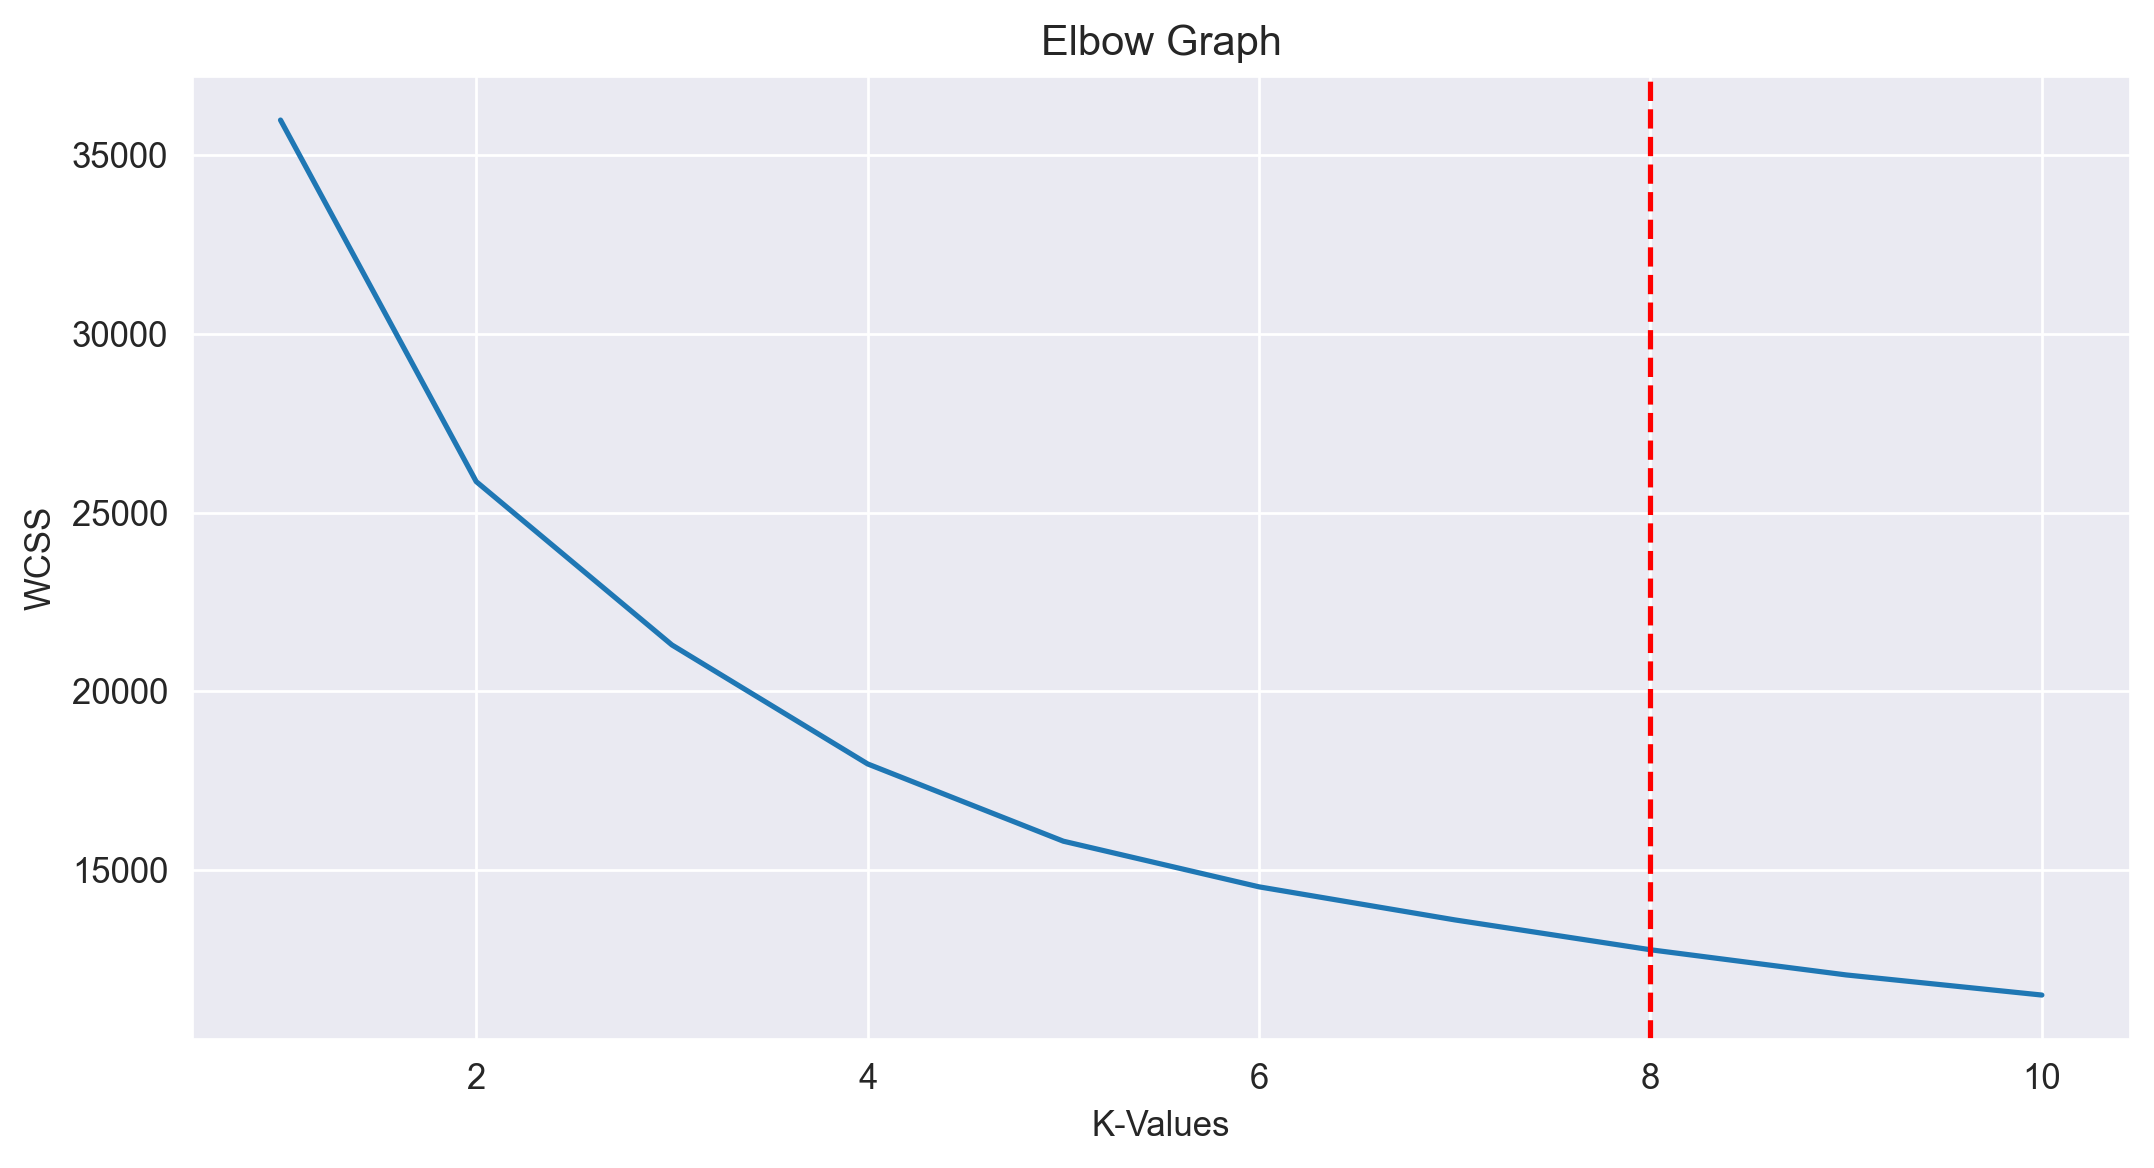

In [54]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 8, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [55]:
km = KMeans(n_clusters=8)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 5, 2, 0])

In [56]:
km.cluster_centers_

array([[ 1.04651392, -0.62331074,  0.        , -0.7270834 ,  0.        ,
         0.        , -0.70522726, -0.67038202, -0.55575377, -0.5515992 ,
        -1.04484146, -0.64576521],
       [-0.75674178, -0.35721486,  0.        , -0.59198447,  0.        ,
         0.        , -0.6418541 , -0.53523592, -0.53149924, -0.53439521,
         0.72951041, -0.7669193 ],
       [ 0.84006298, -0.02855791,  0.        , -0.59841441,  0.        ,
         0.        , -0.44781171, -0.18754609,  1.56376989,  1.58525228,
        -0.7970634 ,  0.12773253],
       [-0.87406924,  0.63007021,  0.        , -0.55804496,  0.        ,
         0.        , -0.32302751,  0.15625684,  1.70335812,  1.72304548,
         0.87043245,  0.51917975],
       [-0.43727354,  1.00416748,  0.        ,  1.52255535,  0.        ,
         0.        ,  1.72637887,  1.56199532,  1.6421366 ,  1.59708189,
         0.44316085,  0.98151233],
       [ 0.6603758 ,  0.16082374,  0.        ,  0.88655641,  0.        ,
         0.        ,  

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
silhouette_score(x,ypred)

0.2546221980185017